<a href="https://colab.research.google.com/github/widdupomiapje/Dreambooth-Stable-Diffusion/blob/main/GPT_Neo_for_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPT Neo for Beginners (No code needed)
## Zack Lee, Eng/Data Science @ CopyAI
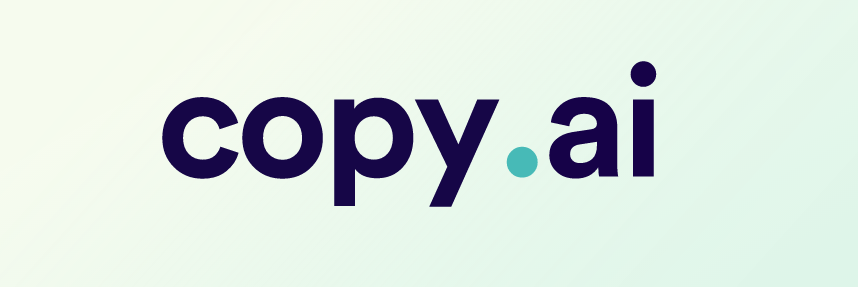
#### Introduction
Welcome to the tutorial! You will be able to interact and play around with GPT-Neo, an open source version of GPT-3 created by [EleutherAI](https://www.eleuther.ai/).

To give you some context, we are currently in a Google Colab Notebook. Notebooks are tools that allow developers to run code in blocks, rather than all at once (e.g. a script). A lot of the starter code is already written for you, so all you need to do is change your text input and run the code. You do not need to know how to program or do ML for this tutorial. I'll be adding more examples actively!

#### What is GPT-Neo?
GPT-Neo is an open source alternative to GPT-3, created by the brilliant researchers at EleutherAI.

**GPT-Neo Pros**
- Open-source
- Actively improving as larger models get trained
- No need to wait for approval - you can use it right now in this notebook :)
- Great community of researchers and developers
- Completely free to use - though you might need to shell out some serious cash if you want the response times to be comparable to GPT-3.

**GPT-3 Pros**
- Trained on a **much** larger dataset - 175B parameters (the current largest pretrained GPT-NEO is 2.7B)
- More mature
- Has larger community
- More documentation
- Web sandbox is great
- Runs on OpenAI's powerful cloud architecture so you get results in a few seconds. This notebook isn't crazy powerful so the results can take several minutes. This can be drastically reduced if you run it with your own GPU-enabled hardware.


#### Colab
Colab is a hosted environment for running Jupyter Notebooks. The main language used in this tutorial is Python, but no Python knowledge is actually necessary to use this notebook.

Notebooks are made up of a mix of Text and Code blocks, also called "Cells". You can run each Code cell with SHIFT + Enter, or you can press the "Play" button on the left of each cell.

So basically to actually get the notebook to do stuff, you have to press on each cell and press SHIFT+ENTER. You can also run the notebook via the Runtime menu options at the top.

Let's try it now! Click into the next cell and press SHIFT + ENTER or the Play button (on the left side of the cell). This will get started in installing the packages for GPT-Neo.




In [ ]:
!pip install torch torchvision
!pip install git+https://github.com/huggingface/transformers@335c0ca35c159f88d73198bdac928e61a4d480c7

  Cloning https://github.com/huggingface/transformers (to revision 335c0ca35c159f88d73198bdac928e61a4d480c7) to /tmp/pip-req-build-dspr30pk
  Running command git clone -q https://github.com/huggingface/transformers /tmp/pip-req-build-dspr30pk
  Running command git checkout -q 335c0ca35c159f88d73198bdac928e61a4d480c7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for transformers: filename=transformers-4.5.0.dev0-cp37-none-any.whl size=2064484 sha256=adea79772611b33f144d8ea31d1d3d64c688eaa50938b9c5197a9a3b39140854
  Stored in directory: /tmp/pip-ephem-wheel-cache-9yzqkqbl/wheels/e7/fe/60/1423dff66ab7cb1144019b536594d49c6a972fe2fb0ab0dc85
Successfully built transformers


## Importing the model from HuggingFace

Run the next two cells to pull in the 1.3B parameter GPT-Neo from HuggingFace. [HuggingFace](https://huggingface.co/) is an amazing AI community that provides a ton of state-of-the-art interfaces and models. If you're more technically inclined, you should check out the model card and code [1.3B](https://huggingface.co/EleutherAI/gpt-neo-1.3B) and [2.7B](https://huggingface.co/EleutherAI/gpt-neo-2.7B) versions of GPT-Neo

It might take a few minutes, go drink some tea/coffee and come back!

If you're on Colab Pro, you can replace this with the 2.7B model for more predictive power.

In [ ]:
#Import Hugging Face's Transformers
from transformers import pipeline
# This is to log our outputs in a nicer format
from pprint import pprint

In [ ]:
# If you want to use the more powerful model: swap 'gpt-neo-1.3B' with 'gpt-neo-2.7B' (beware, it'll be slower and more likely to crash in Colab)
generator = pipeline('text-generation', model='EleutherAI/gpt-neo-1.3B')

## Your first completion

GPT-Neo / GPT-3 are relatively simple to use. You simply pass in a text input (often called a "prompt") and the model will complete the rest of the text. 

You can change how much text is produced with the `max_length` and `min_length` parameters.

You can change how "creative" the model is with the `temperature` parameter. A temperature of 1 would lead to the most unique/creative outputs, and 0 would lead to the most deterministic outputs.

Let's get started by having GPT-Neo complete a very basic sentence for us.

You can edit the inputs either in the cell or the input line to the right of the cell. Make sure you press SHIFT + Enter or the Play button to run the cell!

In [ ]:
#@title Your first completion

prompt = "My name is Zack and I like to"#@param {type: "string"}
min_length = 50#@param {type: "number"}
max_length = 70#@param {type: "number"}
temperature = .7#@param {type: "number"}
output = generator(prompt, do_sample=True, min_length=min_length, max_length=max_length, temperature=temperature)
print()
print()
pprint(output[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.




('My name is Zack and I like to play games. I have been doing it for a long '
 'time. I started in the year 2007 and I have been playing since then. I have '
 'seen many of the games and some of the players that play games. I have also '
 'seen the internet. The internet has opened all sorts of opportunities for '
 'me. I')


## Code Generation

Let's have GPT-Neo write some code! In the prompt, I'm instructing GPT-Neo to produce React Code for a to-do app.
This one might take a while longer to run. Reducing the `max_length` can help improve speed if your notebook crashes.
Let's see how it does:

In [ ]:
#@title Code generation

prompt = "Below is React code for a to-do list app:"#@param {type: "string"}
min_length = 150#@param {type: "number"}
max_length = 250#@param {type: "number"}
temperature = .8#@param {type: "number"}
output = generator(prompt, do_sample=True, max_length=max_length, temperature=temperature)
print()
print()
pprint(output[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.




('Below is React code for a to-do list app:\n'
 '\n'
 "import React, { Component } from 'react'; import { StyleSheet, Text, View, "
 "StatusBar } from 'react-native'; import { connect } from 'react-redux'; "
 "import {mapActions} from 'react-native-router-flux'; import {fetchTaskList} "
 "from '../../../../../actions/TaskListActions'; class TaskList extends "
 'Component {\n'
 '\n'
 'constructor(props) {\n'
 '\n'
 'this.state = { tasks: [] };\n'
 '\n'
 'this.taskList = mapActions({ fetchTaskList: this.fetchTaskList });\n'
 '\n'
 '}\n'
 '\n'
 'render() {\n'
 '\n'
 'return (\n'
 '\n'
 '<View>\n'
 '\n'
 "<StatusBar barStyle='dark-content' />\n"
 '\n'
 '\n'
 '\n'
 '<View style={styles.container}>\n'
 '\n'
 '<Text style={styles.title}>\n'
 '\n'
 '{this.pro')


## Conclusion

Thanks for reading along! This tutorial is being actively updated with more playground examples. Last update: 4/7/21 4:20 PM EST

[Find me doing silly things on Twitter @wenquai](https://twitter.com/wenquai)

And check out the company I work at, [CopyAI](https://www.copy.ai/)! We use Generate Pretrained Transformers to give humans writing superpowers ⚡. We're hiring!
